In [25]:
import networkx as nx
import pandas as pd
import graphlab as gl
%matplotlib inline


## Pagerank

Download data (~7MB): http://graphlab.com/files/datasets/freebase_performances.csv

In [9]:
url = 'http://s3.amazonaws.com/dato-datasets/bond/bond_edges.csv'
data = gl.SFrame.read_csv(url)
g = gl.SGraph().add_edges(data, src_field='src', dst_field='dst')

PROGRESS: Finished parsing file http://s3.amazonaws.com/dato-datasets/bond/bond_edges.csv
PROGRESS: Parsing completed. Parsed 20 lines in 0.01104 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file http://s3.amazonaws.com/dato-datasets/bond/bond_edges.csv
PROGRESS: Parsing completed. Parsed 20 lines in 0.010804 secs.


In [7]:
pr = gl.pagerank.create(g)

PROGRESS: Counting out degree
PROGRESS: Done counting out degree
PROGRESS: +-----------+-----------------------+
PROGRESS: | Iteration | L1 change in pagerank |
PROGRESS: +-----------+-----------------------+
PROGRESS: | 1         | 6.65833               |
PROGRESS: | 2         | 4.65611               |
PROGRESS: | 3         | 3.46298               |
PROGRESS: | 4         | 2.55686               |
PROGRESS: | 5         | 1.95422               |
PROGRESS: | 6         | 1.42139               |
PROGRESS: | 7         | 1.10464               |
PROGRESS: | 8         | 0.806704              |
PROGRESS: | 9         | 0.631771              |
PROGRESS: | 10        | 0.465388              |
PROGRESS: | 11        | 0.364898              |
PROGRESS: | 12        | 0.271257              |
PROGRESS: | 13        | 0.212255              |
PROGRESS: | 14        | 0.159062              |
PROGRESS: | 15        | 0.124071              |
PROGRESS: | 16        | 0.0935911             |
PROGRESS: | 17        |

In [10]:
pr_out = pr['pagerank']
pr_out

__id,pagerank,delta
Inga Bergstorm,0.869872717136,0.00477951418076
Moneypenny,1.18363921275,0.00143637385736
Henry Gupta,0.284762885673,1.89255522874e-05
James Bond,2.52743578524,0.0132914517076
M,1.87718696576,0.00666194771763
Paris Carver,0.284762885673,1.89255522874e-05
Q,1.18363921275,0.00143637385736
Wai Lin,0.869872717136,0.00477951418076
Elliot Carver,0.634064732205,0.000113553313724
Gotz Otto,0.284762885673,1.89255522874e-05


## Look at the data

In [12]:
df = data.to_dataframe()

In [14]:
df

,src,dst,relation
0,Wai Lin,James Bond,friend
1,M,James Bond,worksfor
2,Inga Bergstorm,James Bond,friend
3,Elliot Carver,James Bond,killed_by
4,Gotz Otto,James Bond,killed_by
5,James Bond,M,managed_by
6,Q,M,managed_by
7,Moneypenny,M,managed_by
8,Q,Moneypenny,colleague
9,M,Moneypenny,worksfor


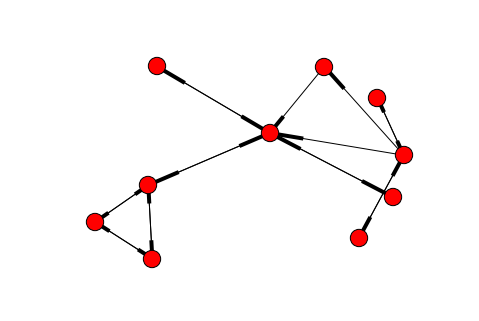

In [24]:
g = nx.DiGraph()
g.add_edges_from(zip(df['src'], df['dst']))
nx.draw(g)

## Tweak the graph for better PR!

In [30]:
def visualize_graph(G, pos=None, return_internals=False):
    # ignore it, we'll come back later
    if pos is None:
        pos = pos=nx.spring_layout(G)
    nx.draw(G, pos)
    _mute = nx.draw_networkx_nodes(G, pos, node_color='#ccccff')
    _mute = nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    labels = dict((n,n) for n in G.nodes())
    _mute = nx.draw_networkx_labels(G, pos, labels=labels)
    edge_labels = {}
    for e in G.edges():
        edge_labels[e] = ','.join(['%s=%s' % (k,v) for (k, v) in G[e[0]][e[1]].items()])
    _mute = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if return_internals:
        return pos, labels, edge_labels

In [49]:
def compute_pagerank(G):
    sg = gl.SGraph().add_edges(gl.SFrame(pd.DataFrame(G.edges(), columns=['src', 'dst'])), src_field='src', dst_field='dst')
    re = gl.pagerank.create(sg)['pagerank'].sort('pagerank', ascending=False)
    re.print_rows(G.number_of_nodes())

PROGRESS: Counting out degree
PROGRESS: Done counting out degree
PROGRESS: +-----------+-----------------------+
PROGRESS: | Iteration | L1 change in pagerank |
PROGRESS: +-----------+-----------------------+
PROGRESS: | 1         | 6.65833               |
PROGRESS: | 2         | 4.29486               |
PROGRESS: | 3         | 2.92562               |
PROGRESS: | 4         | 2.09286               |
PROGRESS: | 5         | 1.48895               |
PROGRESS: | 6         | 1.05414               |
PROGRESS: | 7         | 0.777504              |
PROGRESS: | 8         | 0.555297              |
PROGRESS: | 9         | 0.42015               |
PROGRESS: | 10        | 0.304134              |
PROGRESS: | 11        | 0.233462              |
PROGRESS: | 12        | 0.171289              |
PROGRESS: | 13        | 0.132378              |
PROGRESS: | 14        | 0.0982666             |
PROGRESS: | 15        | 0.0761153             |
PROGRESS: | 16        | 0.057034              |
PROGRESS: | 17        |

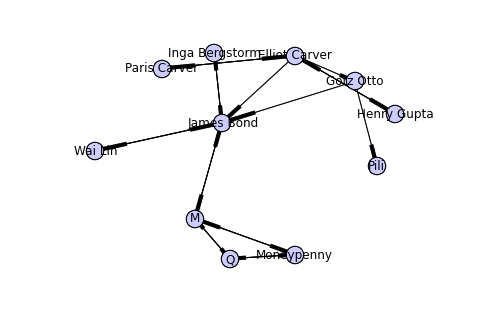

In [50]:
visualize_graph(g)
compute_pagerank(g)

PROGRESS: Counting out degree
PROGRESS: Done counting out degree
PROGRESS: +-----------+-----------------------+
PROGRESS: | Iteration | L1 change in pagerank |
PROGRESS: +-----------+-----------------------+
PROGRESS: | 1         | 6.65833               |
PROGRESS: | 2         | 4.29486               |
PROGRESS: | 3         | 2.92562               |
PROGRESS: | 4         | 2.09286               |
PROGRESS: | 5         | 1.48895               |
PROGRESS: | 6         | 1.05414               |
PROGRESS: | 7         | 0.777504              |
PROGRESS: | 8         | 0.555297              |
PROGRESS: | 9         | 0.42015               |
PROGRESS: | 10        | 0.304134              |
PROGRESS: | 11        | 0.233462              |
PROGRESS: | 12        | 0.171289              |
PROGRESS: | 13        | 0.132378              |
PROGRESS: | 14        | 0.0982666             |
PROGRESS: | 15        | 0.0761153             |
PROGRESS: | 16        | 0.057034              |
PROGRESS: | 17        |

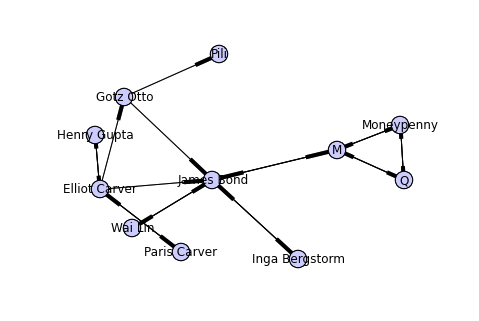

In [51]:
g.add_edge('Gotz Otto', 'Pili')
visualize_graph(g)
compute_pagerank(g)

PROGRESS: Counting out degree
PROGRESS: Done counting out degree
PROGRESS: +-----------+-----------------------+
PROGRESS: | Iteration | L1 change in pagerank |
PROGRESS: +-----------+-----------------------+
PROGRESS: | 1         | 6.23333               |
PROGRESS: | 2         | 3.37167               |
PROGRESS: | 3         | 1.44575               |
PROGRESS: | 4         | 0.860646              |
PROGRESS: | 5         | 0.412101              |
PROGRESS: | 6         | 0.267719              |
PROGRESS: | 7         | 0.137771              |
PROGRESS: | 8         | 0.0867257             |
PROGRESS: | 9         | 0.0464468             |
PROGRESS: | 10        | 0.0283075             |
PROGRESS: | 11        | 0.0155557             |
PROGRESS: | 12        | 0.00930646            |
PROGRESS: +-----------+-----------------------+
+----------------+----------------+-------------------+
|      __id      |    pagerank    |       delta       |
+----------------+----------------+-------------------+

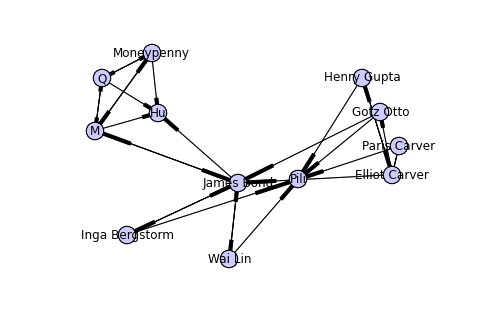

In [55]:
g.add_edge('Henry Gupta', 'Pili')
g.add_edge('Inga Bergstorm', 'Pili')
g.add_edge('Paris Carver', 'Pili')
visualize_graph(g)
compute_pagerank(g)

PROGRESS: Counting out degree
PROGRESS: Done counting out degree
PROGRESS: +-----------+-----------------------+
PROGRESS: | Iteration | L1 change in pagerank |
PROGRESS: +-----------+-----------------------+
PROGRESS: | 1         | 6.23333               |
PROGRESS: | 2         | 3.55229               |
PROGRESS: | 3         | 1.71443               |
PROGRESS: | 4         | 1.00746               |
PROGRESS: | 5         | 0.536893              |
PROGRESS: | 6         | 0.350712              |
PROGRESS: | 7         | 0.181009              |
PROGRESS: | 8         | 0.121721              |
PROGRESS: | 9         | 0.0646834             |
PROGRESS: | 10        | 0.0417997             |
PROGRESS: | 11        | 0.0226814             |
PROGRESS: | 12        | 0.0142585             |
PROGRESS: | 13        | 0.00785697            |
PROGRESS: +-----------+-----------------------+
+----------------+----------------+-------------------+
|      __id      |    pagerank    |       delta       |
+------

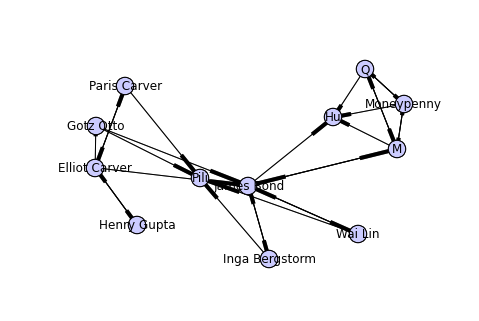

In [54]:
g.add_edge('James Bond', 'Hu')
g.add_edge('M', 'Hu')
g.add_edge('Moneypenny', 'Hu')
g.add_edge('Q', 'Hu')
visualize_graph(g)
compute_pagerank(g)